[Text(0.5192307692307693, 0.95, 'ca <= 0.5\ngini = 0.499\nsamples = 154\nvalue = [123, 114]'),
 Text(0.28205128205128205, 0.85, 'thal <= 1.5\ngini = 0.427\nsamples = 94\nvalue = [103, 46]'),
 Text(0.40064102564102566, 0.8999999999999999, 'True  '),
 Text(0.1794871794871795, 0.75, 'exang <= 0.5\ngini = 0.191\nsamples = 66\nvalue = [92, 11]'),
 Text(0.1282051282051282, 0.65, 'thalach <= 92.5\ngini = 0.148\nsamples = 57\nvalue = [80, 7]'),
 Text(0.10256410256410256, 0.55, 'gini = 0.0\nsamples = 1\nvalue = [0, 3]'),
 Text(0.15384615384615385, 0.55, 'thalach <= 161.0\ngini = 0.091\nsamples = 56\nvalue = [80, 4]'),
 Text(0.1282051282051282, 0.45, 'thalach <= 156.5\ngini = 0.198\nsamples = 26\nvalue = [32, 4]'),
 Text(0.05128205128205128, 0.35, 'chol <= 269.0\ngini = 0.069\nsamples = 21\nvalue = [27, 1]'),
 Text(0.02564102564102564, 0.25, 'gini = 0.0\nsamples = 17\nvalue = [24, 0]'),
 Text(0.07692307692307693, 0.25, 'thalach <= 132.0\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.05128

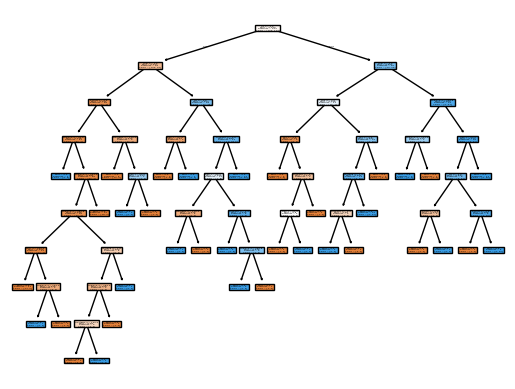

In [ ]:
from sklearn.tree import plot_tree
plot_tree(model.estimators_[0], feature_names=X.columns, filled=True)

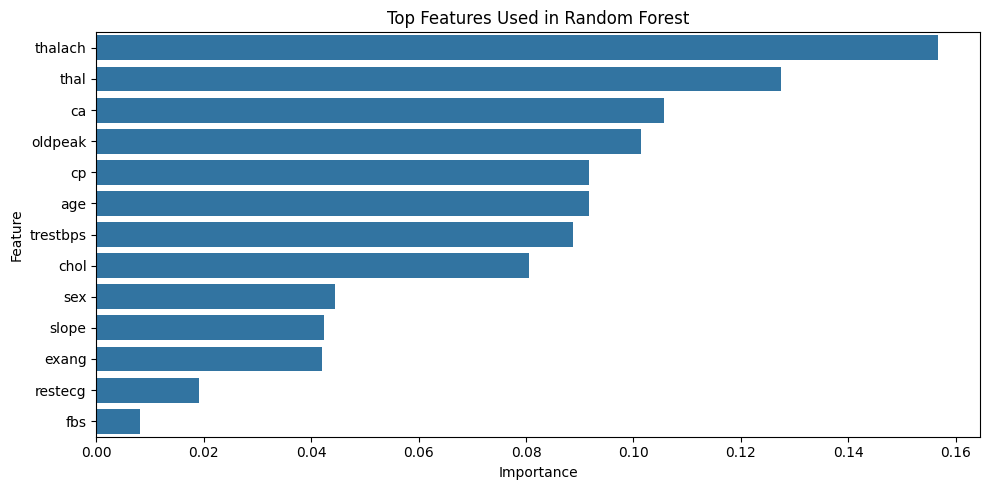

In [9]:
# 1. Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# 2. Create a DataFrame
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 3. Plot feature importances
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.barplot(data=feat_imp_df, x='Importance', y='Feature')
plt.title("Top Features Used in Random Forest")
plt.tight_layout()
plt.show()


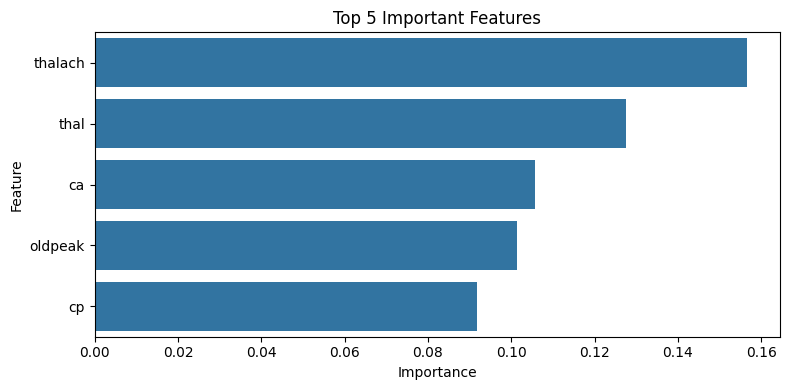

In [ ]:
top5 = feat_imp_df.head(5)

plt.figure(figsize=(8, 4))
sns.barplot(data=top5, x='Importance', y='Feature')
plt.title("Top 5 Important Features")
plt.tight_layout()
plt.show()

Accuracy: 0.7

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.69      0.71        32
           1       0.67      0.71      0.69        28

    accuracy                           0.70        60
   macro avg       0.70      0.70      0.70        60
weighted avg       0.70      0.70      0.70        60



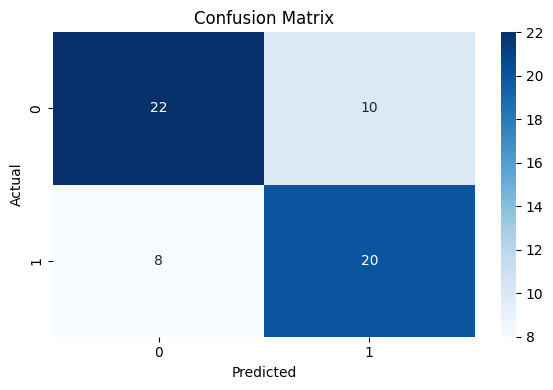

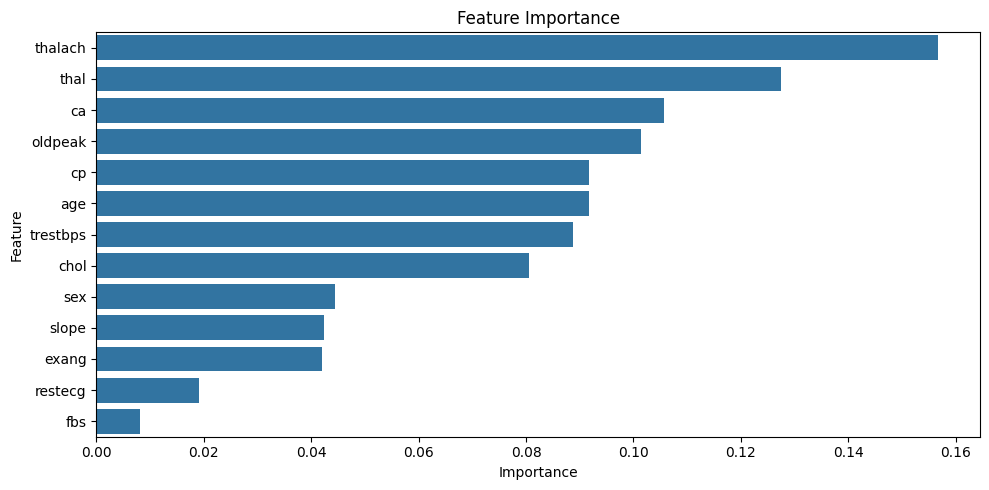

In [7]:
# Heart Disease Prediction using Random Forest

# 1. Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 2. Load dataset
df = pd.read_csv("../Heart Disease Prediction using Random Forest/heart_cleveland_upload.csv")  # Make sure this CSV matches your structure

# 3. Define features and target
X = df.drop("condition", axis=1)
y = df["condition"]

# 4. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 6. Predict
y_pred = model.predict(X_test)

# 7. Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 8. Confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# 9. Feature importance plot
importances = model.feature_importances_
feature_names = X.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(data=feat_imp_df, x='Importance', y='Feature')
plt.title("Feature Importance")
plt.tight_layout()
plt.show()
